# PART A

In [816]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Read dataset 1

In [817]:
data1 = pd .read_csv('Part1+-+Car+name.csv')

In [818]:
data1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


### Read dataset 2

In [819]:
data2 = pd.read_json('Part1+-+Car-Attributes.json')

In [820]:
data2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### Merge both datasets

In [821]:
data_df = pd.merge(data1, data2, left_index = True, right_index = True)

In [822]:
data_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [823]:
numerical_features = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr']
categorical_features = ['car_name']

### 5 point summary of the numerical features and insights

In [824]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


Insights:

The 5-number summary for mpg: minimum = 9.0, 25th percentile = 17.5, median = 23.0, 75th percentile = 29.0, maximum = 46.6.
The distribution of mpg indicates that most vehicles have a fuel efficiency between 17.5 and 29.0 miles per gallon. There is a significant difference between the minimum and maximum mpg values, suggesting a wide range of fuel efficiency among the vehicles in the dataset.

The 5-number summary for cyl: minimum = 3.0, 25th percentile = 4.0, median = 4.0, 75th percentile = 8.0, maximum = 8.0. The majority of vehicles in the dataset have either 4 or 8 cylinders, as indicated by the median and the 75th percentile. There is a smaller range of variation in the number of cylinders compared to other variables, with the minimum and maximum values both being within one standard deviation of the mean.

The 5-number summary for disp: minimum = 68.0, 25th percentile = 104.25, median = 148.5, 75th percentile = 262.0, maximum = 455.0. The distribution of engine displacements ranges from 68.0 to 455.0 cubic inches, indicating a wide variation in engine sizes among the vehicles in the dataset. The majority of engine displacements fall within the range of 104.25 to 262.0 cubic inches, as indicated by the 25th and 75th percentiles.

The 5-number summary for wt: minimum = 1613.0, 25th percentile = 2223.75, median = 2803.5, 75th percentile = 3608.0, maximum = 5140.0. The weight of vehicles in the dataset ranges from 1613.0 to 5140.0 pounds, indicating a significant difference in vehicle sizes. The majority of vehicles have weights between 2223.75 and 3608.0 pounds, as indicated by the 25th and 75th percentiles.

The 5-number summary for acc: minimum = 8.0, 25th percentile = 13.825, median = 15.5, 75th percentile = 17.175, maximum = 24.8. The acceleration values range from 8.0 to 24.8 seconds, suggesting a wide variation in the rate at which vehicles can achieve higher speeds. Most vehicles have accelerations between 13.825 and 17.175 seconds, as indicated by the 25th and 75th percentiles.

## Data Preparation & Analysis:

### Feature-wise percentage of missing values.

In [825]:
missing_values = data_df.isnull().sum()

In [826]:
missing_percentage = (missing_values / len(data_df)) * 100

In [827]:
print("Percentage of Missing Values:")
print(missing_percentage)

Percentage of Missing Values:
car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


There are no missing values in the dataset

### Duplicate values in the data.

In [828]:
duplicate_rows = data_df.duplicated()
print("Number of Duplicate Rows:", duplicate_rows.sum())

Number of Duplicate Rows: 0


### Plot a pairplot for all features.

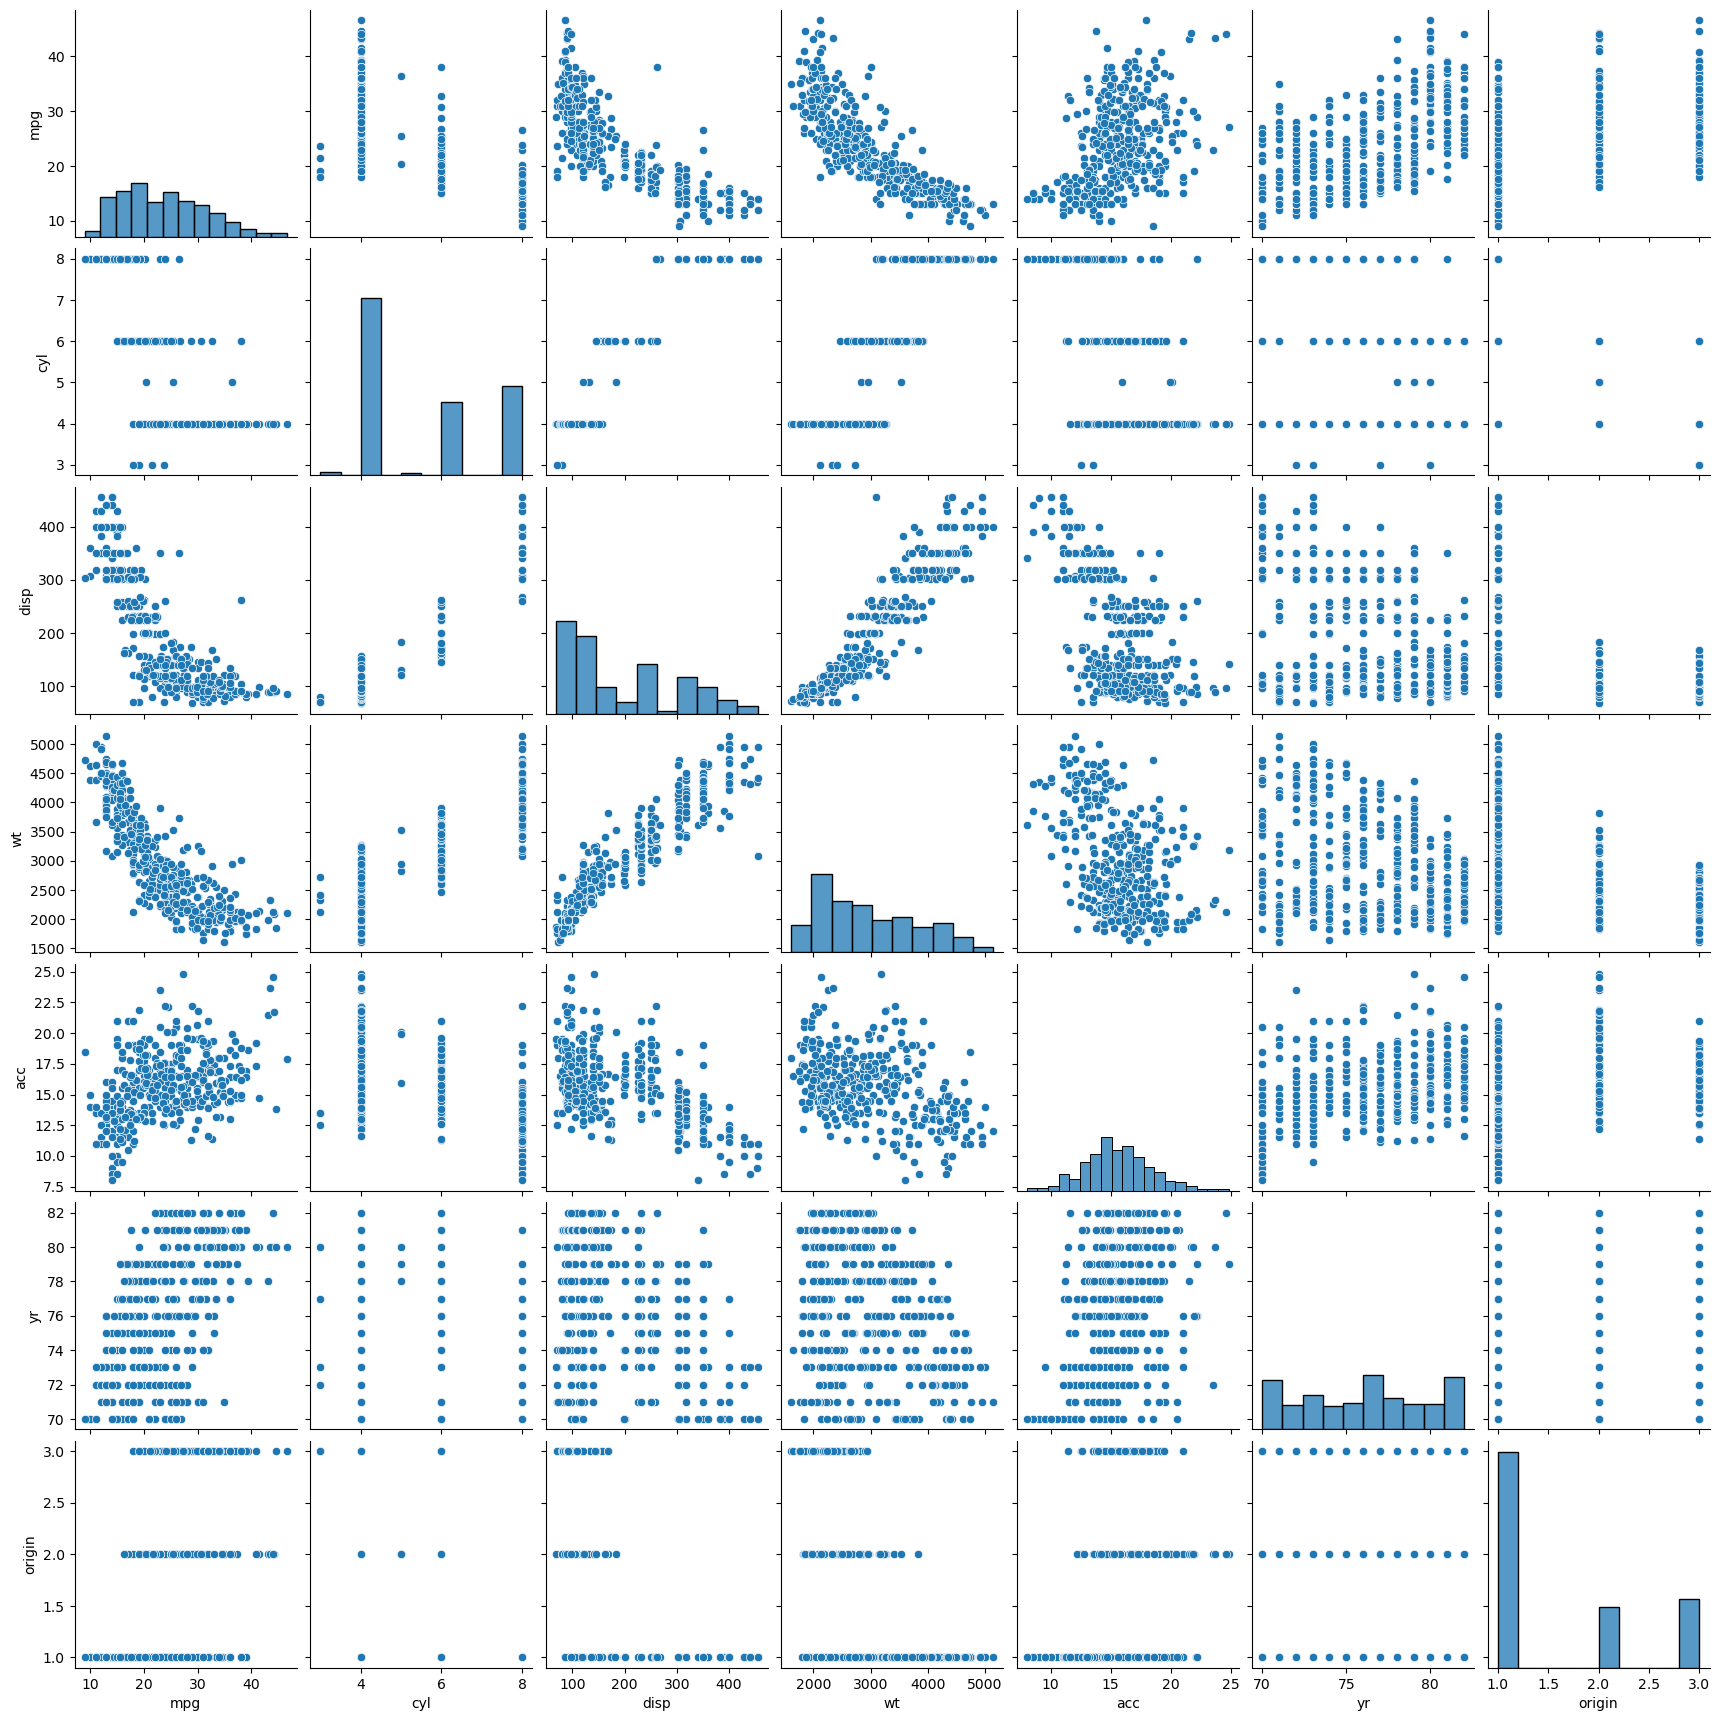

In [829]:
sns.pairplot(data_df)
plt.show()

### Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

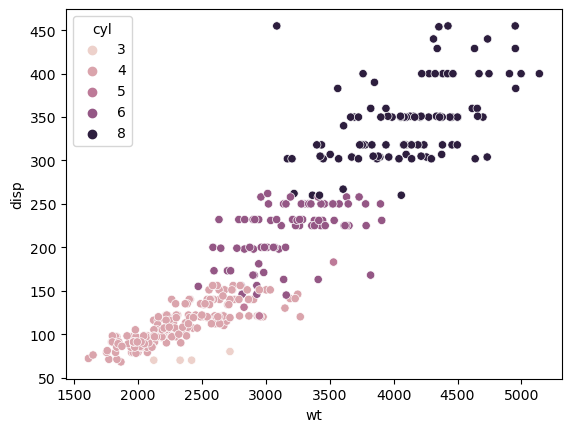

In [830]:
sns.scatterplot(data = data_df, x='wt', y='disp', hue='cyl')
plt.show()

### Insights

Relationship between weight and displacement: Generally, there is a positive correlation between weight and displacement. As the weight of the car increases, the displacement tends to be higher as well. This suggests that heavier cars tend to have larger engine displacements.

Clusters based on cylinder count: The data points are differentiated by the number of cylinders ('cyl'). We can observe distinct clusters or groups of data points based on the cylinder count. This indicates that the number of cylinders has a significant impact on both weight and displacement.

Cylinder count and outliers: We may notice that certain cylinder counts (e.g., 4 cylinders, 6 cylinders, 8 cylinders) have more pronounced patterns or concentrated data points, while other cylinder counts may have fewer data points or appear as outliers. This suggests that the number of cylinders plays a vital role in determining the weight and displacement of the vehicles.

Variation within each cylinder count: Within each cylinder count group, there is a range of weights and displacements. This implies that factors other than just the number of cylinders also influence the weight and displacement of the cars. Other attributes such as engine design, car model, or additional features may contribute to the variations observed within each cylinder count group.

### Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

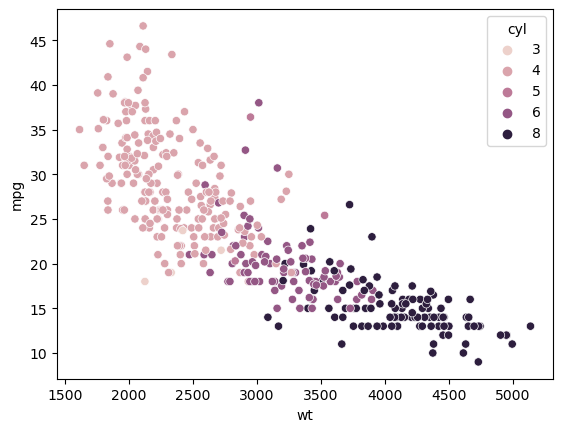

In [831]:
sns.scatterplot(data = data_df, x='wt', y='mpg', hue='cyl')
plt.show()

### Insights

Inverse relationship between weight and fuel efficiency: There is a general inverse relationship between weight ('wt') and fuel efficiency ('mpg'). As the weight of the car increases, the miles per gallon tends to decrease. This implies that heavier cars tend to have lower fuel efficiency, which is expected due to the additional energy required to move a heavier vehicle.

Clusters based on cylinder count: The data points are differentiated by the number of cylinders ('cyl'). We can observe distinct clusters or groups of data points based on the cylinder count. This indicates that the number of cylinders has a significant impact on both weight and fuel efficiency.

Fuel efficiency outliers: We may notice that within certain cylinder count groups, there are outliers in terms of fuel efficiency. These outliers represent cars with exceptionally high or low miles per gallon values compared to the majority of cars with the same number of cylinders. This could be due to various factors such as different car models, engine configurations, or driving conditions.

Variation within each cylinder count: Within each cylinder count group, there is a range of weights and fuel efficiencies. This suggests that factors other than just the number of cylinders also contribute to the variations observed within each cylinder count group. Other attributes such as engine design, car model, aerodynamics, and transmission type may influence the weight and fuel efficiency of the vehicles.

### Unexpected values in all the features and datapoints

In [832]:
unexpected_values = data_df[data_df['hp'] == '?']
print("\nData Points with Unexpected Values:\n", unexpected_values)


Data Points with Unexpected Values:
                  car_name   mpg  cyl   disp hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0  ?  2046  19.0  71       1
126         ford maverick  21.0    6  200.0  ?  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0  ?  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0  ?  2905  14.3  80       1
354           renault 18i  34.5    4  100.0  ?  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0  ?  3035  20.5  82       1


In [833]:
data_df = data_df[data_df != '?'].dropna()

## Clustering:

### Apply K-Means clustering for 2 to 10 clusters

In [834]:
features = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin']
clusters_range = range(2, 11)
inertia = []

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
    kmeans.fit(data_df[features])
    inertia.append(kmeans.inertia_)

### Plot a visual and find elbow point.

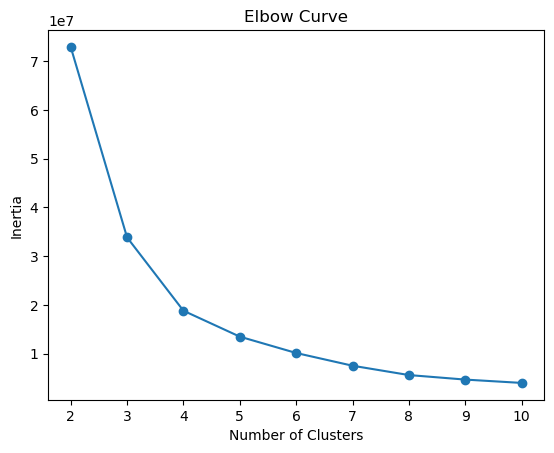

In [835]:
plt.plot(clusters_range, inertia, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

### From the above visual, highlighting the possible Elbow points.

The elbow point indicates the optimal number of clusters. It is the point of inflection or a significant decrease in inertia. Based on the plot, it appears that the possible elbow points are at k=3 and k=4.

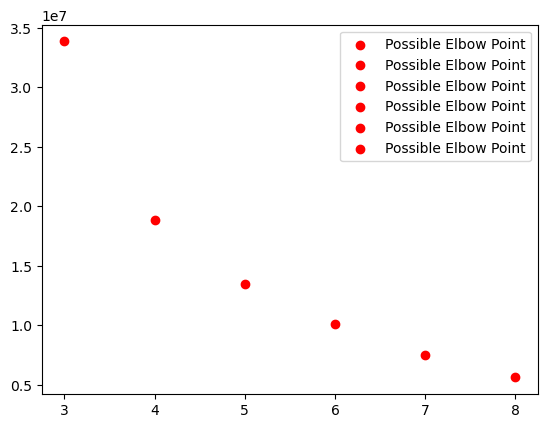

Possible Elbow Points: [3, 4, 5, 6, 7, 8]


In [836]:
diff = [inertia[i] - inertia[i-1] for i in range(1, len(inertia))]
elbow_points = []
threshold = 0.1  

for i in range(1, len(diff)-1):
    if diff[i] <= threshold * diff[i-1] and diff[i] <= threshold * diff[i+1]:
        elbow_points.append(i + 2)  

for elbow_point in elbow_points:
    plt.scatter(elbow_point, inertia[elbow_point-2], color='red', label='Possible Elbow Point')

plt.legend()
plt.show()
print("Possible Elbow Points:", elbow_points)

### K-means clustering model on the optimal number of clusters

In [837]:
optimal_k = elbow_points[4]  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_df[features])

KMeans(n_clusters=7, random_state=42)

### Add a new feature in the DataFrame which will have labels based upon cluster value.

In [838]:
data_df['cluster_label'] = kmeans.labels_
labels = kmeans.labels_

data_df['cluster_label'] = labels
print(data_df.head())

                    car_name   mpg  cyl   disp   hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1   

   cluster_label  
0              5  
1              5  
2              3  
3              3  
4              3  


### Plot a visual and color the datapoints based upon clusters.

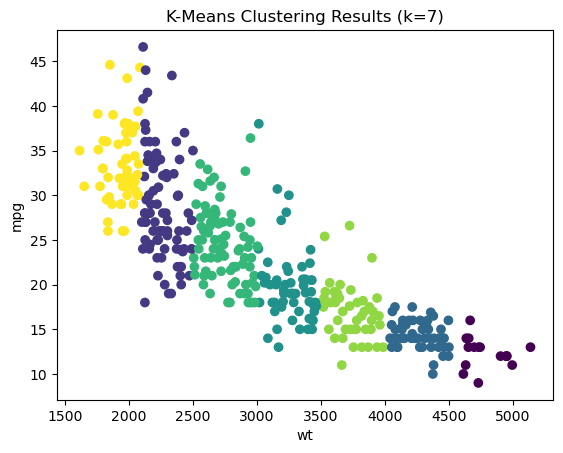

In [839]:
plt.scatter(data_df['wt'], data_df['mpg'], c=data_df['cluster_label'])
plt.xlabel('wt')
plt.ylabel('mpg')
plt.title(f'K-Means Clustering Results (k={optimal_k})')
plt.show()

### Pass a new DataPoint and predict which cluster it belongs to.

In [840]:
new_data_point = pd.DataFrame({'mpg': [18.0], 'cyl': [8], 'disp': [318.0], 'hp': [150], 'wt': [3436], 'acc': [11.0], 'yr': [70], 'origin': [1]})

In [841]:
new_data_point.fillna(new_data_point.mean(), inplace=True)

In [842]:
new_data_point.replace([np.inf, -np.inf], 1e9, inplace=True)

In [843]:
max_float64 = np.finfo(np.float64).max
new_data_point = new_data_point.where(new_data_point <= max_float64, max_float64)

In [844]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

new_data_point['wt'] = scaler.fit_transform(new_data_point[['wt']])

In [845]:
new_data_point_scaled = (new_data_point - data_df[features].mean()) / data_df[features].std()

In [846]:
cluster_prediction = kmeans.predict(new_data_point_scaled)
print("\nCluster Prediction for New Data Point:", cluster_prediction)


Cluster Prediction for New Data Point: [6]


# PART B

In [847]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Read the data

In [848]:
data = pd.read_csv('vehicle.csv')

In [849]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### Check percentage of missing values and impute with correct approach

In [850]:
data['class'] = data['class'].astype('category')

In [851]:
missing_percentages = (data.isnull().sum() / len(data)) * 100
print(missing_percentages)

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


In [852]:
low_missing_cols = ['circularity', 'distance_circularity', 'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about.1', 'skewness_about.2']
for col in low_missing_cols:
    data[col].fillna(data[col].mean(), inplace=True)

### Visualize a Pie-chart and print percentage of values for variable ‘class’.

In [853]:
class_counts = data['class'].value_counts()
class_percentage = class_counts / len(data) * 100
print("Class Distribution:")
print(class_percentage)

Class Distribution:
car    50.709220
bus    25.768322
van    23.522459
Name: class, dtype: float64


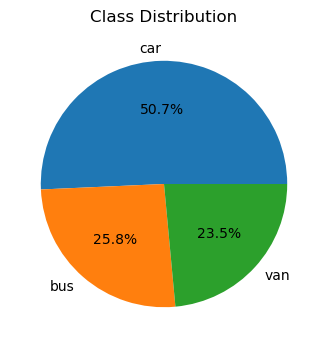

In [854]:
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

### Check for duplicate rows in the data and impute with correct approach.

In [855]:
duplicate_rows = data.duplicated()
print("Duplicate Rows:", duplicate_rows.sum())

Duplicate Rows: 0


### Replace missing values with median

In [856]:
df_main = data.copy()

In [857]:
data_columns = []
for column in data.columns:
    data_columns.append(column)

In [858]:
for column in data_columns:
    if df_main[column].isna().sum() > 0:
        median = df_main[column].median()
        df_main[column] = df_main[column].fillna(df_main[column].median())

In [859]:
df_main.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [860]:
target_column = 'class'
le = preprocessing.LabelEncoder()
le.fit(df_main[target_column])
df_main[target_column] = le.transform(df_main[target_column]) 

df_main.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


## Data Preparation:

### Split data into X and Y.

In [861]:
X = data.drop('class', axis=1)
y = data['class']

In [862]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Standardize the Data.

In [863]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [864]:
X_train[np.isnan(X_train)] = 0
X_train[np.isinf(X_train)] = np.finfo(X_train.dtype).max
X_test[np.isnan(X_test)] = 0
X_test[np.isinf(X_test)] = np.finfo(X_test.dtype).max

### Train a base Classification model using SVM

In [865]:
X_scaled[np.isnan(X_scaled)] = 0  
X_scaled[np.isinf(X_scaled)] = np.finfo(X_scaled.dtype).max

In [866]:
X_scaled.dtype

dtype('float64')

In [867]:
y.dtype

CategoricalDtype(categories=['bus', 'car', 'van'], ordered=False)

In [868]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9705882352941176


### Print Classification metrics for train data.

In [869]:
predictions = svm.predict(X_scaled)
print("Classification Report (Base SVM Model):")
print(classification_report(Y, predictions))

Classification Report (Base SVM Model):
              precision    recall  f1-score   support

         bus       0.99      0.98      0.98       218
         car       0.99      0.98      0.99       429
         van       0.95      0.98      0.97       199

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846



### Apply PCA on the data with 10 components.

In [870]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

### Visualize Cumulative Variance Explained with Number of Components.

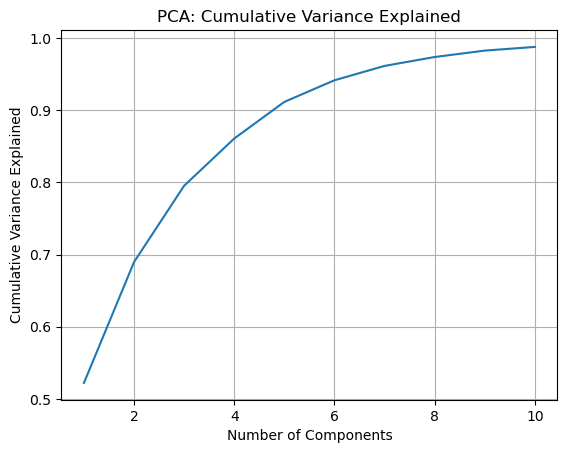

In [871]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA: Cumulative Variance Explained')
plt.grid(True)
plt.show()

### Draw a horizontal line on the above plot to highlight the threshold of 90%

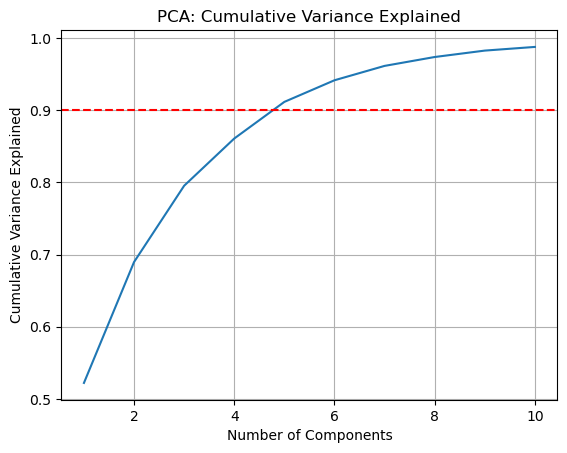

In [872]:
threshold = 0.90
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA: Cumulative Variance Explained')
plt.grid(True)
plt.show()

### Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. 

In [873]:
n_components = np.argmax(cumulative_variance >= threshold) + 1
pca_selected = PCA(n_components = n_components)
X_pca_selected = pca_selected.fit_transform(X_scaled)

### Train SVM model on components selected from above step

In [874]:
svm_selected = SVC()
svm_selected.fit(X_pca_selected, Y)

SVC()

### Print Classification metrics for train data of above model and share insights

In [875]:
predictions_selected = svm_selected.predict(X_pca_selected)
print("Classification Report (PCA Selected SVM Model):")
print(classification_report(Y, predictions_selected))

Classification Report (PCA Selected SVM Model):
              precision    recall  f1-score   support

         bus       0.86      0.68      0.76       218
         car       0.84      0.89      0.87       429
         van       0.70      0.76      0.73       199

    accuracy                           0.81       846
   macro avg       0.80      0.78      0.78       846
weighted avg       0.81      0.81      0.81       846



Insights:
1. Precision: The precision for the "bus" class is 86%. The precision for the "car" class is 84%. The precision for the "van" class is 70%.
2. Recall: The recall for the "bus" class is 68%. The recall for the "car" class is 89% of the actual car instances. The recall for the "van" class 76%.
3. F1-score: The F1-score for the "bus" class is 0.76, representing a balanced performance in terms of precision and recall for bus instances. The F1-score for the "car" class is 0.87, indicating a good balance between precision and recall for car instances. The F1-score for the "van" class is 0.73, suggesting a reasonable trade-off between precision and recall for van instances.
4. Accuracy: The overall accuracy of the model is 0.81, indicating that it correctly classifies 81% of the instances in the dataset. The accuracy metric provides a general measure of the model's performance across all classes.

## Performance Improvement:

### Train another SVM on the components out of PCA. Tune the parameters to improve performance

In [876]:
parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
svm_tuned = GridSearchCV(SVC(), parameters, cv=5)
svm_tuned.fit(X_pca_selected, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

### Share best Parameters observed from above step

In [877]:
print("Best Parameters:", svm_tuned.best_params_)

Best Parameters: {'C': 10, 'kernel': 'rbf'}


### Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights

In [878]:
predictions_tuned = svm_tuned.predict(X_pca_selected)
print("Classification Report (Tuned SVM Model):")
print(classification_report(Y, predictions_tuned))

Classification Report (Tuned SVM Model):
              precision    recall  f1-score   support

         bus       0.85      0.83      0.84       218
         car       0.91      0.92      0.91       429
         van       0.81      0.82      0.81       199

    accuracy                           0.87       846
   macro avg       0.86      0.85      0.85       846
weighted avg       0.87      0.87      0.87       846



In [879]:
base_accuracy = accuracy_score(Y, predictions)
selected_accuracy = accuracy_score(Y, predictions_selected)
tuned_accuracy = accuracy_score(Y, predictions_tuned)

In [880]:
improvement_selected = (selected_accuracy - base_accuracy) * 100
improvement_tuned = (tuned_accuracy - base_accuracy) * 100

In [881]:
print("Relative Improvement in Accuracy:")
print("Base SVM Model vs. PCA Selected SVM Model:", improvement_selected)
print("Base SVM Model vs. Tuned SVM Model:", improvement_tuned)

Relative Improvement in Accuracy:
Base SVM Model vs. PCA Selected SVM Model: -17.375886524822693
Base SVM Model vs. Tuned SVM Model: -11.111111111111105


### Data Understanding & Cleaning:

### Explain pre-requisite/assumptions of PCA.

Principal Component Analysis (PCA) assumes that the data is linearly correlated and that the variables are standardized or have similar scales. PCA works best when the variables have high variance and the relationships between them are linear or close to linear.

### Advantages and limitations of PCA

1. Dimensionality Reduction: PCA reduces the dimensionality of the data by transforming it into a lower-dimensional space while retaining most of the important information.
2. Feature Extraction: PCA extracts the underlying important features from the data, allowing for better understanding and interpretation.
3. Data Visualization: PCA can be used to visualize high-dimensional data in a lower-dimensional space, making it easier to analyze and interpret.

#### Limitations of PCA:
1. Information Loss: PCA may result in information loss as it focuses on retaining the maximum variance in the data. Some less important but unique information may be lost during the dimensionality reduction process.
2. Linearity Assumption: PCA assumes that the relationships between variables are linear. If the relationships are nonlinear, PCA may not capture the underlying structure effectively.
3. Interpretability: The principal components obtained from PCA are linear combinations of the original variables, which can make them difficult to interpret in terms of the original features.